In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
df_multi_df_list_p = {}
df_multi_df_list_n = {}
for m in range(0,11):
    ignore_events_threshold = m*0.2
    df_list_p = []
    df_list_n = []
    for i in range(1,26):
        # Read the CSV file into a DataFrame
        file_path = '../thesis_data/arne_03_05/logs_arne_imag_03_05_tt3/log'+str(i)+'.txt'

        df = pd.read_csv(file_path, sep='\t')

        # Column to check for changes
        column_to_check = 'Gazing'

        # Filter rows where the column value changes
        df_filtered = df[df[column_to_check] != df[column_to_check].shift()].copy()

        print("\nFiltered DataFrame:")
        print(df_filtered)
        def is_integer_trial(row):
            try:
                int_value = int(row['Trial'])
                return True
            except ValueError:
                return False

        df_filtered['gazing_time'] = df_filtered['Time'].shift(-1) - df_filtered['Time']
        df_filtered_2 = df_filtered[df_filtered.apply(lambda row: is_integer_trial(row),axis=1)].copy()
        df_filtered_3 = df_filtered_2[df_filtered_2['Gazing']!='0'].copy()
        df_filtered_final_p = df_filtered_3[df_filtered_3.apply(lambda row: float(row['gazing_time'])>=ignore_events_threshold,axis=1)].copy()
        df_filtered_final_n = df_filtered_3[df_filtered_3.apply(lambda row: float(row['gazing_time'])<ignore_events_threshold,axis=1)].copy()


        df_list_p.append(df_filtered_final_p)
        df_list_n.append(df_filtered_final_n)
        
    df_multi_df_list_p[str(ignore_events_threshold)]=df_list_p
    df_multi_df_list_n[str(ignore_events_threshold)]=df_list_n



Filtered DataFrame:
         Time                GazeX                GazeY Trial Target Gazing
0   67.340730                   xx                   xx    xx     xx     xx
1   67.349788   128.36042404174805   350.36460131406784     1      3      0
24  68.948243   -85.02857208251953   248.31661167740822     1      3     10
25  69.013315   -130.3997039794922    198.1556075513363     1      3      0
27  69.148366  -217.92560291290283   101.14542040228844     1      3     11
30  69.354310  -314.87892293930054   15.951724380254745     1      3      0
31  69.424535   -341.9521164894104   -9.467987269163132     1      3      4
34  69.622350   -433.5201258659363  -115.29021674394608     1      3      0
38  69.888458  -386.63794898986816  -210.88122510910034     1      3      4
39  69.957945   -318.1139130592346   -238.5495473742485     1      3      5
41  70.089647  -159.42497205734253   -286.4749329686165     1      3      0
42  70.157384   -80.23059797286987  -302.34817296266556     1      


Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    268.687990                   xx                   xx    xx     xx     xx
1    268.696049    79.11419677734375    350.6449474096298    22      3      0
13   269.525966   112.28994083404541   240.86920568346977    22      3     11
17   269.793364   -149.0370569229126   31.565916895866394    22      3      0
18   269.867224   -235.1453833580017  -28.481467723846436    22      3     10
21   270.085037   -428.5274577140808   -139.8587658405304    22      3      0
23   270.224215   -495.6582713127136    -192.219571352005    22      3     13
24   270.295459   -492.3729901313782  -219.94015485048294    22      3      0
25   270.366894   -493.7746510505676   -242.1134596467018    22      3      2
27   270.514610  -437.47658586502075   -294.9805669784546    22      3      0
28   270.585724  -379.02143383026123   -315.2631719112396    22      3      1
31   270.795508    -156.338773727417  -350.


Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0   135.290256                   xx                   xx    xx     xx     xx
1   135.296982   2.0376720428466797     439.483938485384     7      9      0
24  136.861109    99.72457981109619   130.08850541710854     7      9      8
26  136.999170   -10.29594612121582    25.09146237373352     7      9      0
27  137.066084  -62.849215507507324  -25.384002327919006     7      9      7
29  137.199889  -139.88774585723877   -83.03678798675537     7      9      0
31  137.335257  -224.55574893951416  -184.49035316705704     7      9     12
32  137.403362   -288.4984288215637  -212.85191649198532     7      9      0
33  137.469805     -353.96160364151  -242.43716579675674     7      9      5
35  137.606986   -445.9341287612915   -290.0548725128174     7      9      0
37  137.749575   -509.2006344795227  -294.31597995758057     7      9     11
41  138.027705   -611.4429574012756  -215.9913321733474


Filtered DataFrame:
          Time                GazeX               GazeY Trial Target Gazing
0   108.912190                   xx                  xx    xx     xx     xx
1   108.919012    -5.15196418762207  396.75924470834434     5      2      0
21  110.411874   22.504337310791016   261.0925443917513     5      2     11
24  110.630321  -149.55955410003662  212.73818385601044     5      2      0
25  110.697289  -226.35738801956177  191.88013887405396     5      2     16
29  110.983891   -436.1373152732849  20.236208081245422     5      2      0
32  111.192803   -495.1179642677307  -79.00476479530334     5      2      2
63  113.296841                   yy                  yy    yy     yy     yy
64  113.799559                   zz                  zz    zz     zz     zz

Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    115.439259                   xx                   xx    xx     xx     xx
1    115.445028   14.779778480529785    36


Filtered DataFrame:
         Time                GazeX                GazeY Trial Target Gazing
0   67.340730                   xx                   xx    xx     xx     xx
1   67.349788   128.36042404174805   350.36460131406784     1      3      0
24  68.948243   -85.02857208251953   248.31661167740822     1      3     10
25  69.013315   -130.3997039794922    198.1556075513363     1      3      0
27  69.148366  -217.92560291290283   101.14542040228844     1      3     11
30  69.354310  -314.87892293930054   15.951724380254745     1      3      0
31  69.424535   -341.9521164894104   -9.467987269163132     1      3      4
34  69.622350   -433.5201258659363  -115.29021674394608     1      3      0
38  69.888458  -386.63794898986816  -210.88122510910034     1      3      4
39  69.957945   -318.1139130592346   -238.5495473742485     1      3      5
41  70.089647  -159.42497205734253   -286.4749329686165     1      3      0
42  70.157384   -80.23059797286987  -302.34817296266556     1      


Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0   293.768221                   xx                   xx    xx     xx     xx
1   293.774889    94.80259895324707   315.61550675332546    25     15      0
13  294.578916   107.34294319152832    258.5763552635908    25     15     16
18  294.913564    -150.198486328125    61.94093942642212    25     15      0
20  295.042593  -221.72692680358887    6.562787175178528    25     15     14
28  295.608063   -172.0240774154663   -66.43293356895447    25     15      0
30  295.742231    -92.7537145614624   -65.41669929027557    25     15     13
36  296.147553   -88.18649625778198  -220.80030870437622    25     15      0
38  296.278634   -262.2566843032837  -255.09454715251923    25     15      8
41  296.479911   -472.7883324623108  -269.91377234458923    25     15      0
42  296.548844   -534.5090575218201  -270.34053003787994    25     15     11
44  296.682252   -578.8121581077576  -215.3772988915443


Filtered DataFrame:
          Time               GazeX               GazeY Trial Target Gazing
0   287.705709                  xx                  xx    xx     xx     xx
1   287.714161   95.81640243530273   325.6873088926077    24      4      0
27  289.483916  111.73977470397949  208.97020107507706    24      4      4
57  291.569818                  yy                  yy    yy     yy     yy
58  292.073912                  zz                  zz    zz     zz     zz

Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0   293.768221                   xx                   xx    xx     xx     xx
1   293.774889    94.80259895324707   315.61550675332546    25     15      0
13  294.578916   107.34294319152832    258.5763552635908    25     15     16
18  294.913564    -150.198486328125    61.94093942642212    25     15      0
20  295.042593  -221.72692680358887    6.562787175178528    25     15     14
28  295.608063   -172.0240774154663   -66.4329

In [3]:
def print_object_attributes(obj):
    if isinstance(obj, dict):
        for key, value in obj.items():
            print(f"{key}: {value}")
    else:
        for attr in dir(obj):
            if not attr.startswith('__') and not attr.endswith('__'):
                value = getattr(obj, attr)
                print(f"{attr}: {value}")

print_object_attributes(df_multi_df_list_p)

0.0: [         Time                GazeX                GazeY Trial Target Gazing  \
24  68.948243   -85.02857208251953   248.31661167740822     1      3     10   
27  69.148366  -217.92560291290283   101.14542040228844     1      3     11   
31  69.424535   -341.9521164894104   -9.467987269163132     1      3      4   
38  69.888458  -386.63794898986816  -210.88122510910034     1      3      4   
39  69.957945   -318.1139130592346   -238.5495473742485     1      3      5   
42  70.157384   -80.23059797286987  -302.34817296266556     1      3     16   
48  70.560177   215.59197235107422    -188.767449259758     1      3      3   

    gazing_time  
24     0.065071  
27     0.205945  
31     0.197816  
38     0.069487  
39     0.131702  
42     0.203426  
48     2.082462  ,          Time               GazeX                GazeY Trial Target Gazing  \
19  76.455607  -265.4917502403259   168.24768126010895     2      8      6   
23  76.730740  -517.9865823984146    7.940516173839569     2

1.2000000000000002: [         Time               GazeX              GazeY Trial Target Gazing  \
48  70.560177  215.59197235107422  -188.767449259758     1      3      3   

    gazing_time  
48     2.082462  ,          Time              GazeX                GazeY Trial Target Gazing  \
46  78.255615  323.7846736907959  -202.53238928318024     2      8      8   

    gazing_time  
46     2.282985  ,           Time               GazeX               GazeY Trial Target Gazing  \
19   84.068831  100.99636459350586    222.749851715751     3      3      4   
67   89.511667   191.3404655456543  249.94935196638107     3      3      3   
122  95.442059  201.56060600280762  260.72070693969727     3      3      3   

     gazing_time  
19      1.416252  
67      1.916133  
122     2.118487  ,           Time               GazeX               GazeY Trial Target Gazing  \
76  104.670108  -496.4481854438782  201.86436635255814     4     13     13   

    gazing_time  
76     2.119524  ,           Tim

2.0: [         Time               GazeX              GazeY Trial Target Gazing  \
48  70.560177  215.59197235107422  -188.767449259758     1      3      3   

    gazing_time  
48     2.082462  ,          Time              GazeX                GazeY Trial Target Gazing  \
46  78.255615  323.7846736907959  -202.53238928318024     2      8      8   

    gazing_time  
46     2.282985  ,           Time               GazeX               GazeY Trial Target Gazing  \
122  95.442059  201.56060600280762  260.72070693969727     3      3      3   

     gazing_time  
122     2.118487  ,           Time               GazeX               GazeY Trial Target Gazing  \
76  104.670108  -496.4481854438782  201.86436635255814     4     13     13   

    gazing_time  
76     2.119524  ,           Time               GazeX               GazeY Trial Target Gazing  \
32  111.192803  -495.1179642677307  -79.00476479530334     5      2      2   

    gazing_time  
32     2.104038  ,            Time             

In [4]:
def count_p(df_list_p):
    count_true_positive = 0
    count_false_positive = 0
    for df in df_list_p:
        c_tp = len(df[df.apply(lambda row: float(row['Target'])==float(row['Gazing']),axis=1)])
        c_fp = len(df[df.apply(lambda row: float(row['Target'])!=float(row['Gazing']),axis=1)])
        count_true_positive+= c_tp
        count_false_positive+= c_fp
    return count_true_positive,count_false_positive

def count_n(df_list_n):
    count_true_negative = 0
    count_false_negative = 0
    for df in df_list_n:
        c_tn = len(df[df.apply(lambda row: float(row['Target'])!=float(row['Gazing']),axis=1)])
        c_fn = len(df[df.apply(lambda row: float(row['Target'])==float(row['Gazing']),axis=1)])
        count_true_negative+= c_tn
        count_false_negative+= c_fn
    return count_true_negative,count_false_negative

data_for_graph = {
    "Dwelltime":[],
    "count_true_positive":[],
    "count_false_positive":[],
    "count_true_negative":[],
    "count_false_negative":[]
    
}
for m in range(0,11):
    ignore_events_threshold = m*0.2
    count_true_positive,count_false_positive = count_p(df_multi_df_list_p[str(ignore_events_threshold)])
    count_true_negative,count_false_negative = count_n(df_multi_df_list_n[str(ignore_events_threshold)])
    data_for_graph["Dwelltime"].append(str(round(ignore_events_threshold,2)))
    if(count_true_positive==0):
        data_for_graph["count_true_positive"].append(0)
    else:
        data_for_graph["count_true_positive"].append((count_true_positive/(count_true_positive+count_false_positive))*100)
    if(count_false_positive==0):
        data_for_graph["count_false_positive"].append(0)
    else:
        data_for_graph["count_false_positive"].append((count_false_positive/(count_true_positive+count_false_positive))*100)
    if(count_true_negative==0):
        data_for_graph["count_true_negative"].append(0)
    else:
        data_for_graph["count_true_negative"].append((count_true_negative/(count_true_negative+count_false_negative))*100)
    if(count_false_negative==0):
        data_for_graph["count_false_negative"].append(0)
    else:
        data_for_graph["count_false_negative"].append((count_false_negative/(count_true_negative+count_false_negative))*100)
    




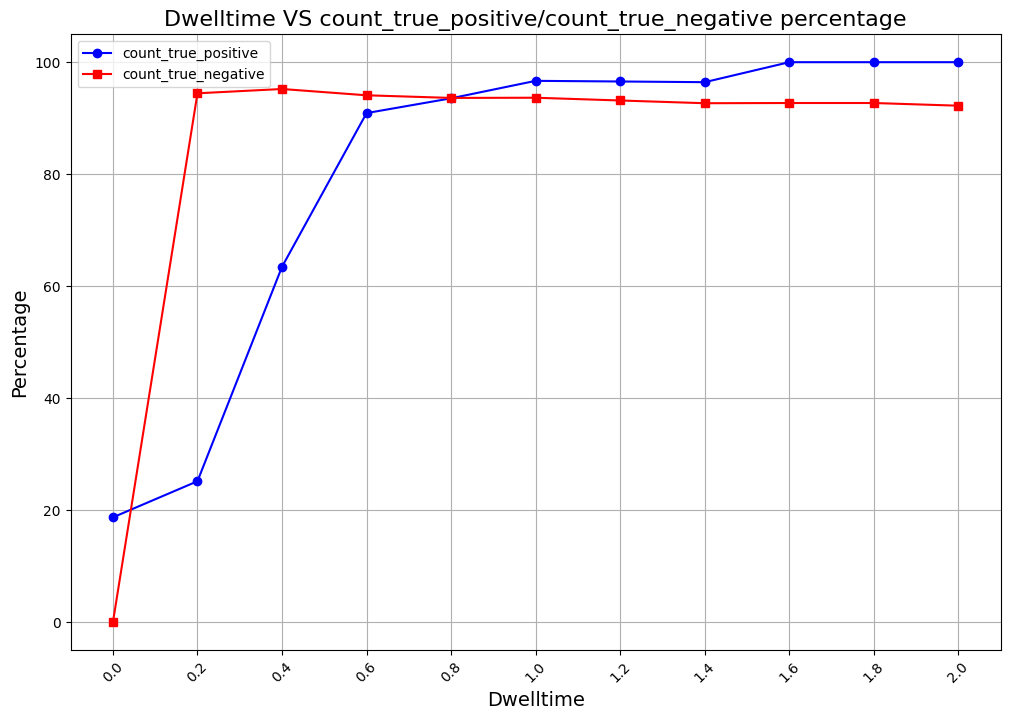

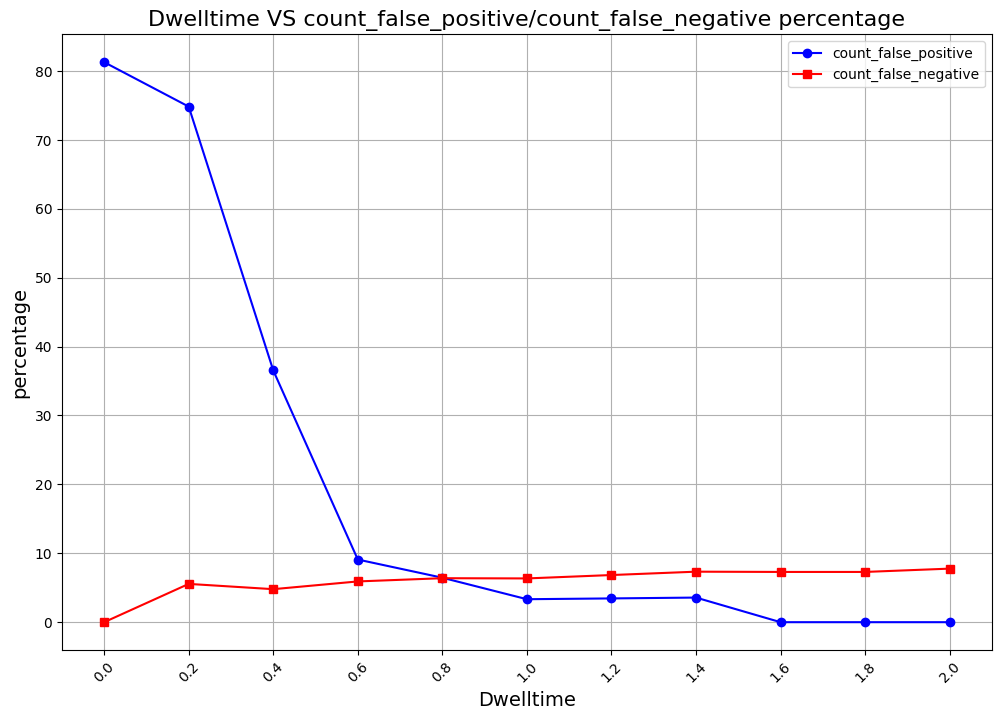

In [5]:
# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_positive"], marker='o', linestyle='-', color='b', label='count_true_positive')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_negative"], marker='s', linestyle='-', color='r', label='count_true_negative')

# Adding titles and labels
plt.title('Dwelltime VS true_positive/true_negative percentage', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_positive"], marker='o', linestyle='-', color='b', label='count_false_positive')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_negative"], marker='s', linestyle='-', color='r', label='count_false_negative')

# Adding titles and labels
plt.title('Dwelltime VS false_positive/false_negative percentage', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

In [6]:
# Specify the file name
file_name = 'eye_data_for_graph.json'

# Save the dictionary to a file
with open(file_name, 'w') as file:
    json.dump(data_for_graph, file)